# Variables Control Charts

The following notebook has been prepared for students in my Statistics 193.1 Introduction to Statistical Quality Control class. Data and examples are taken from Montgomery (2009).

Install required libraries (on first run only)

In [1]:
# install.packages("qcc") # for control charts
# install.packages("ggplotify")
# install.packages("gridExtra")

Load libraries

In [2]:
library(qcc)
library(ggplotify)
library(gridExtra)

Package 'qcc' version 2.7
Type 'citation("qcc")' for citing this R package in publications.
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Xbar and R Charts

In [3]:
# data from Montgomery
hardbake.p1 <- rbind(
    c(1.3235, 1.4128, 1.6744, 1.4573, 1.6914),
    c(1.4314, 1.3592, 1.6075, 1.4666, 1.6109),
    c(1.4284, 1.4871, 1.4932, 1.4324, 1.5674),
    c(1.5028, 1.6352, 1.3841, 1.2831, 1.5507),
    c(1.5604, 1.2735, 1.5265, 1.4363, 1.6441),
    c(1.5955, 1.5451, 1.3574, 1.3281, 1.4198),
    c(1.6274, 1.5064, 1.8366, 1.4177, 1.5144),
    c(1.4190, 1.4303, 1.6637, 1.6067, 1.5519),
    c(1.3884, 1.7277, 1.5355, 1.5176, 1.3688),
    c(1.4039, 1.6697, 1.5089, 1.4627, 1.5220),
    c(1.4158, 1.7667, 1.4278, 1.5928, 1.4181),
    c(1.5821, 1.3355, 1.5777, 1.3908, 1.7559),
    c(1.2856, 1.4106, 1.4447, 1.6398, 1.1928),
    c(1.4951, 1.4036, 1.5893, 1.6458, 1.4969),
    c(1.3589, 1.2863, 1.5996, 1.2497, 1.5471),
    c(1.5747, 1.5301, 1.5171, 1.1839, 1.8662),
    c(1.3680, 1.7269, 1.3957, 1.5014, 1.4449),
    c(1.4163, 1.3864, 1.3057, 1.6210, 1.5573),
    c(1.5796, 1.4185, 1.6541, 1.5116, 1.7247),
    c(1.7106, 1.4412, 1.2361, 1.3820, 1.7601),
    c(1.4371, 1.5051, 1.3485, 1.5670, 1.4880),
    c(1.4738, 1.5936, 1.6583, 1.4973, 1.4720),
    c(1.5917, 1.4333, 1.5551, 1.5295, 1.6866),
    c(1.6399, 1.5243, 1.5705, 1.5563, 1.5530),
    c(1.5797, 1.3663, 1.6240, 1.3732, 1.6887)
)

colnames(hardbake.p1) <- c("samp_1","samp_2","samp_3","samp_4","samp_5")

head(hardbake.p1)

samp_1,samp_2,samp_3,samp_4,samp_5
1.3235,1.4128,1.6744,1.4573,1.6914
1.4314,1.3592,1.6075,1.4666,1.6109
1.4284,1.4871,1.4932,1.4324,1.5674
1.5028,1.6352,1.3841,1.2831,1.5507
1.5604,1.2735,1.5265,1.4363,1.6441
1.5955,1.5451,1.3574,1.3281,1.4198


In [4]:
# sample averages:
samp_means <- apply(hardbake.p1, 1, mean)
samp_means

[1] 1.51188 1.49512 1.48170 1.47118 1.48816 1.44918 1.58050 1.53432 1.50760
[10] 1.51344 1.52424 1.52840 1.39470 1.52614 1.40832 1.53440 1.48738 1.45734
[19] 1.57770 1.50600 1.46914 1.53900 1.55924 1.56880 1.52638

In [5]:
# sample ranges:
samp_range <- apply(hardbake.p1, 1, function(x) max(x) - min(x))
samp_range

[1] 0.3679 0.2517 0.1390 0.3521 0.3706 0.2674 0.4189 0.2447 0.3589 0.2658
[11] 0.3509 0.4204 0.4470 0.2422 0.3499 0.6823 0.3589 0.3153 0.3062 0.5240
[21] 0.2185 0.1863 0.2533 0.1156 0.3224

In [6]:
# overall mean and range
c(mean(samp_means), mean(samp_range))

[1] 1.505610 0.325208

In [7]:
# tabulated values
A2 <- 0.577
D3 <- 0
D4 <- 2.114

# our control limits for the xbar chart
lcl.x <- mean(samp_means) - A2 * mean(samp_range)
ucl.x <- mean(samp_means) + A2 * mean(samp_range)

c(lcl.x, ucl.x)

[1] 1.317965 1.693255

In [8]:
# our control limits for the R chart
ucl.r <- D4 * mean(samp_range)
lcl.r <- D3 * mean(samp_range)

c(lcl.r, ucl.r)

[1] 0.0000000 0.6874897

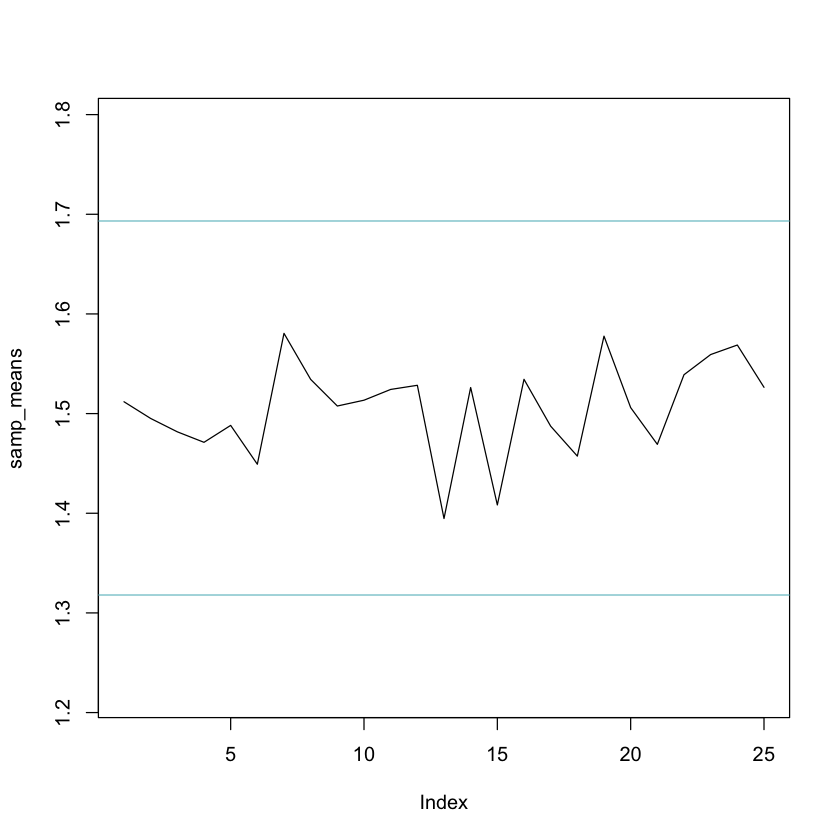

In [9]:
plot(samp_means, type = "l", ylim = c(lcl.x - 0.1, ucl.x + 0.1))
abline(h = ucl.x, col = "cadetblue3")
abline(h = lcl.x, col = "cadetblue3")

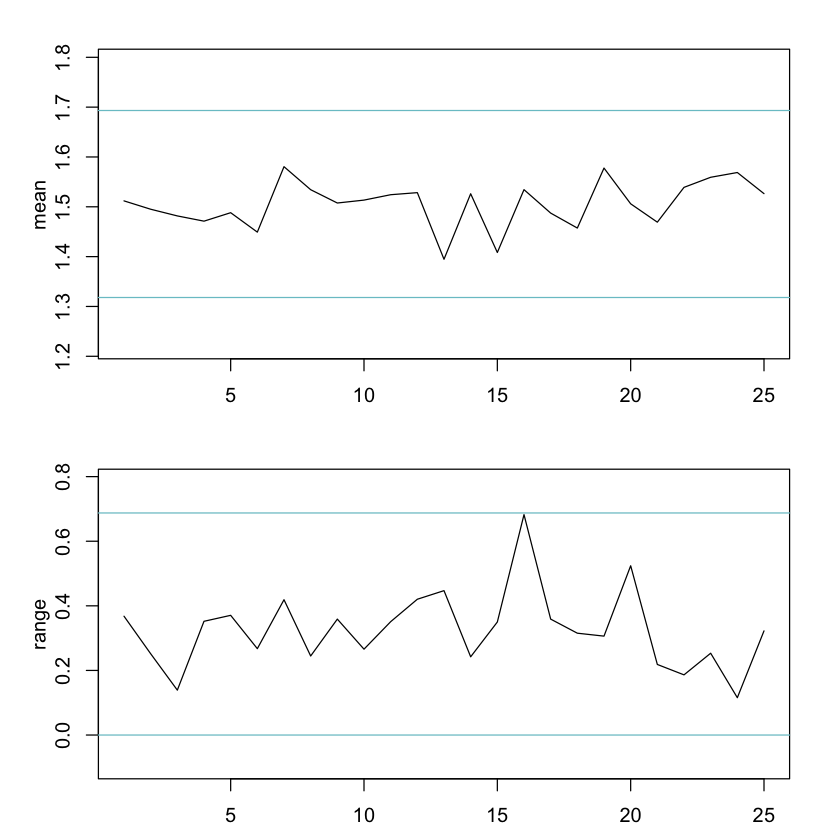

In [10]:
# plot the R chart
grid.arrange(
    as.grob(function(){
        plot(samp_means, type = "l", ylim = c(lcl.x - 0.1, ucl.x + 0.1),
        xlab = "", ylab = "mean")
        abline(h = ucl.x, col = "cadetblue3")
        abline(h = lcl.x, col = "cadetblue3")
    }),
    as.grob(function(){
        plot(samp_range, type = "l", ylim = c(lcl.r - 0.1, ucl.r + 0.1),
        xlab = "", ylab = "range")
        abline(h = ucl.r, col = "cadetblue3")
        abline(h = lcl.r, col = "cadetblue3")
    }),
    nrow = 2
)

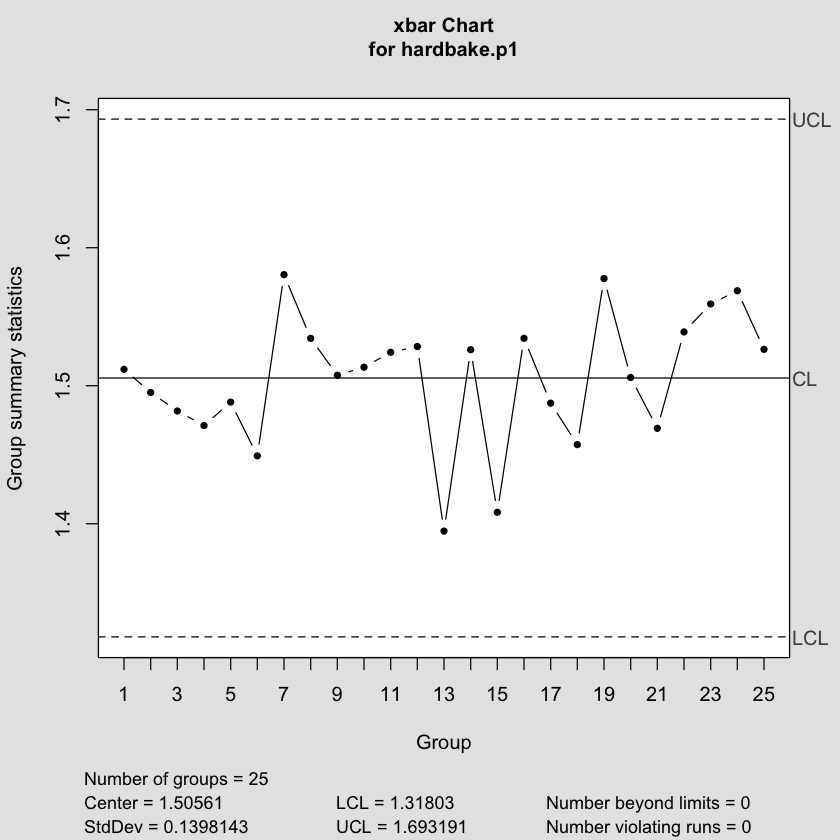

In [11]:
qchart.x <- qcc(hardbake.p1, type="xbar")
plot(qchart.x)

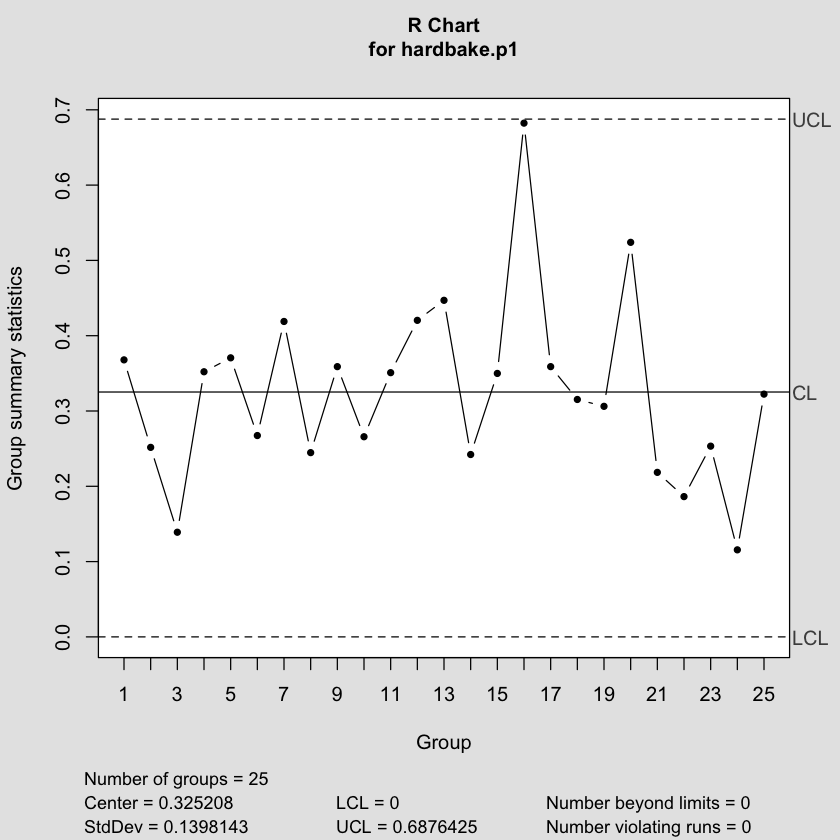

In [12]:
qchart.r <- qcc(hardbake.p1, type="R")
plot(qchart.r)

In [13]:
# for the phase 2
hardbake.p2 <- rbind(
    c(1.4483, 1.5458, 1.4538, 1.4303, 1.6206),
    c(1.5435, 1.6899, 1.5830, 1.3358, 1.4187),
    c(1.5175, 1.3446, 1.4723, 1.6657, 1.6661),
    c(1.5454, 1.0931, 1.4072, 1.5039, 1.5264),
    c(1.4418, 1.5059, 1.5124, 1.4620, 1.6263),
    c(1.4301, 1.2725, 1.5945, 1.5397, 1.5252),
    c(1.4981, 1.4506, 1.6174, 1.5837, 1.4962),
    c(1.3009, 1.5060, 1.6231, 1.5831, 1.6454),
    c(1.4132, 1.4603, 1.5808, 1.7111, 1.7313),
    c(1.3817, 1.3135, 1.4953, 1.4894, 1.4596),
    c(1.5765, 1.7014, 1.4026, 1.2773, 1.4541),
    c(1.4936, 1.4373, 1.5139, 1.4808, 1.5293),
    c(1.5729, 1.6738, 1.5048, 1.5651, 1.7473),
    c(1.8089, 1.5513, 1.8250, 1.4389, 1.6558),
    c(1.6236, 1.5393, 1.6738, 1.8698, 1.5036),
    c(1.4120, 1.7931, 1.7345, 1.6391, 1.7791),
    c(1.7372, 1.5663, 1.4910, 1.7809, 1.5504),
    c(1.5971, 1.7394, 1.6832, 1.6677, 1.7974),
    c(1.4295, 1.6536, 1.9134, 1.7272, 1.4370),
    c(1.6217, 1.8220, 1.7915, 1.6744, 1.9404)
)

colnames(hardbake.p2) <- c("samp_1","samp_2","samp_3","samp_4","samp_5")

head(hardbake.p2)

samp_1,samp_2,samp_3,samp_4,samp_5
1.4483,1.5458,1.4538,1.4303,1.6206
1.5435,1.6899,1.5830,1.3358,1.4187
1.5175,1.3446,1.4723,1.6657,1.6661
1.5454,1.0931,1.4072,1.5039,1.5264
1.4418,1.5059,1.5124,1.4620,1.6263
1.4301,1.2725,1.5945,1.5397,1.5252


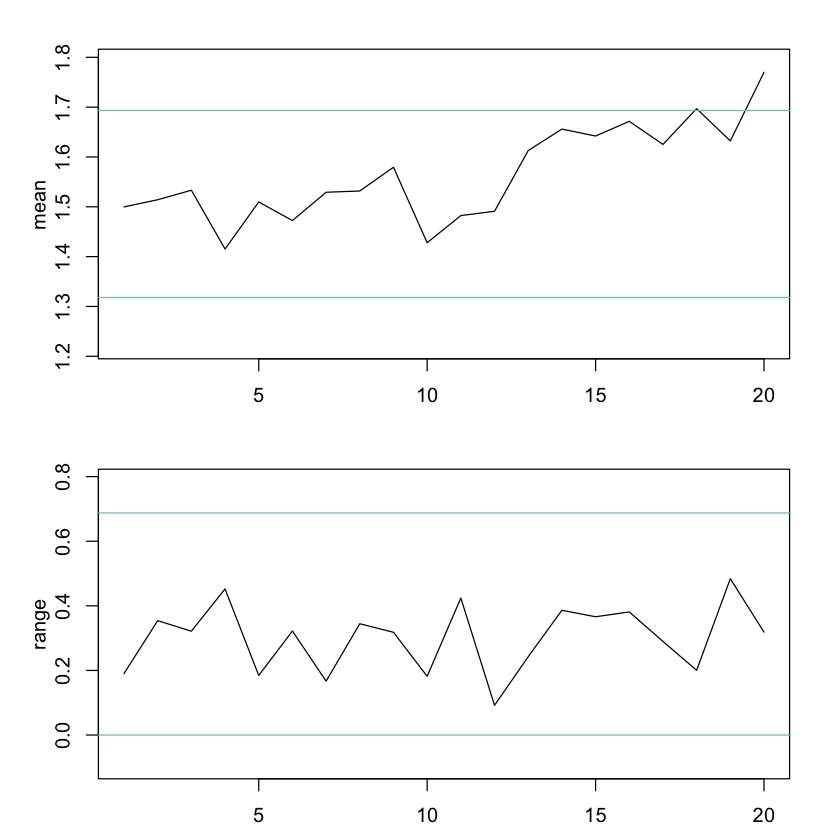

In [14]:
samp_means2 <- apply(hardbake.p2, 1, mean)
samp_range2 <- apply(hardbake.p2, 1, function(x) max(x) - min(x))

# plot the R chart
grid.arrange(
    as.grob(function(){
        plot(samp_means2, type = "l", ylim = c(lcl.x - 0.1, ucl.x + 0.1),
        xlab = "", ylab = "mean")
        abline(h = ucl.x, col = "cadetblue3")
        abline(h = lcl.x, col = "cadetblue3")
    }),
    as.grob(function(){
        plot(samp_range2, type = "l", ylim = c(lcl.r - 0.1, ucl.r + 0.1),
        xlab = "", ylab = "range")
        abline(h = ucl.r, col = "cadetblue3")
        abline(h = lcl.r, col = "cadetblue3")
    }),
    nrow = 2
)

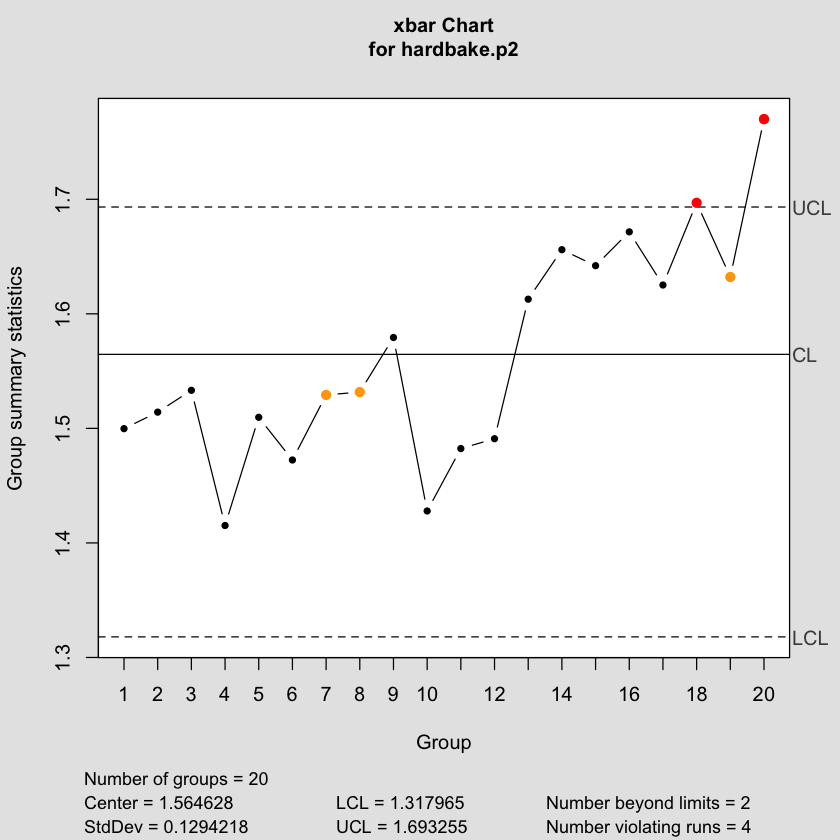

In [15]:
qchart2.x <- qcc(hardbake.p2, type="xbar", limits = c(lcl.x, ucl.x))

plot(qchart2.x)

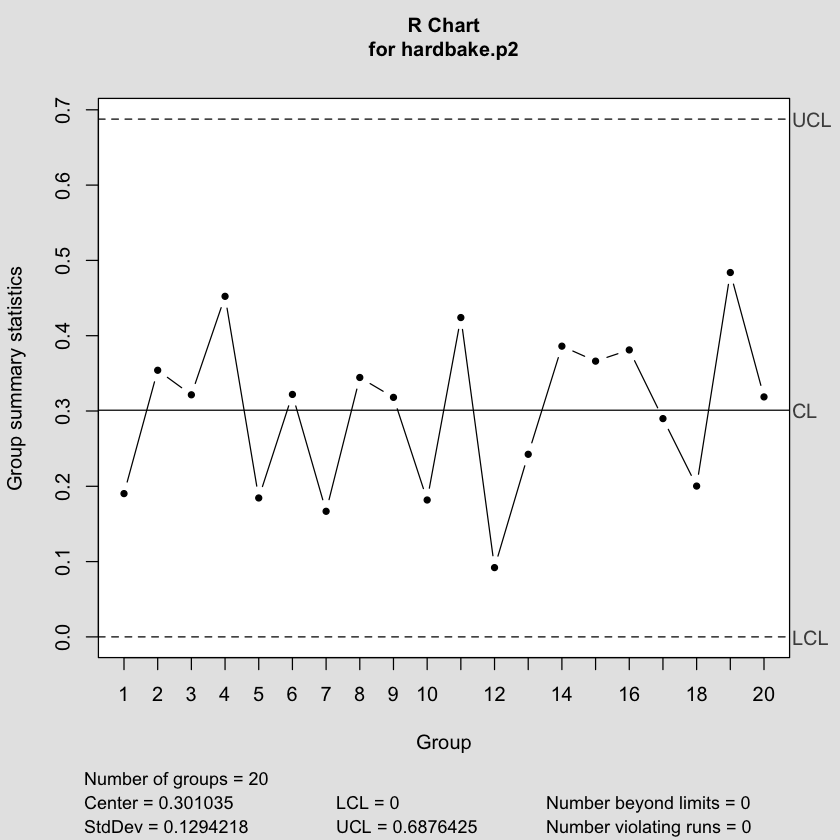

In [16]:
#qchart2.r <- qcc(hardbake.p2, type="R", limits = c(lcl.r, ucl.r))
qchart2.r <- qcc(hardbake.p2, type="R", limits = qchart.r$limits)

plot(qchart2.r)

In [17]:
hardbake.p2 <- data.frame(hardbake.p2)
hardbake.p2$samp_num <- 1:nrow(hardbake.p2)

head(hardbake.p2)

samp_1,samp_2,samp_3,samp_4,samp_5,samp_num
1.4483,1.5458,1.4538,1.4303,1.6206,1
1.5435,1.6899,1.5830,1.3358,1.4187,2
1.5175,1.3446,1.4723,1.6657,1.6661,3
1.5454,1.0931,1.4072,1.5039,1.5264,4
1.4418,1.5059,1.5124,1.4620,1.6263,5
1.4301,1.2725,1.5945,1.5397,1.5252,6


In [18]:
hardbake.wide <- reshape(hardbake.p2, varying = c("samp_1","samp_2","samp_3","samp_4","samp_5"),
        v.names = "output", direction = "long")
        
head(hardbake.wide)

,samp_num,time,output,id
1.1,1,1,1.4483,1
2.1,2,1,1.5435,2
3.1,3,1,1.5175,3
4.1,4,1,1.5454,4
5.1,5,1,1.4418,5
6.1,6,1,1.4301,6


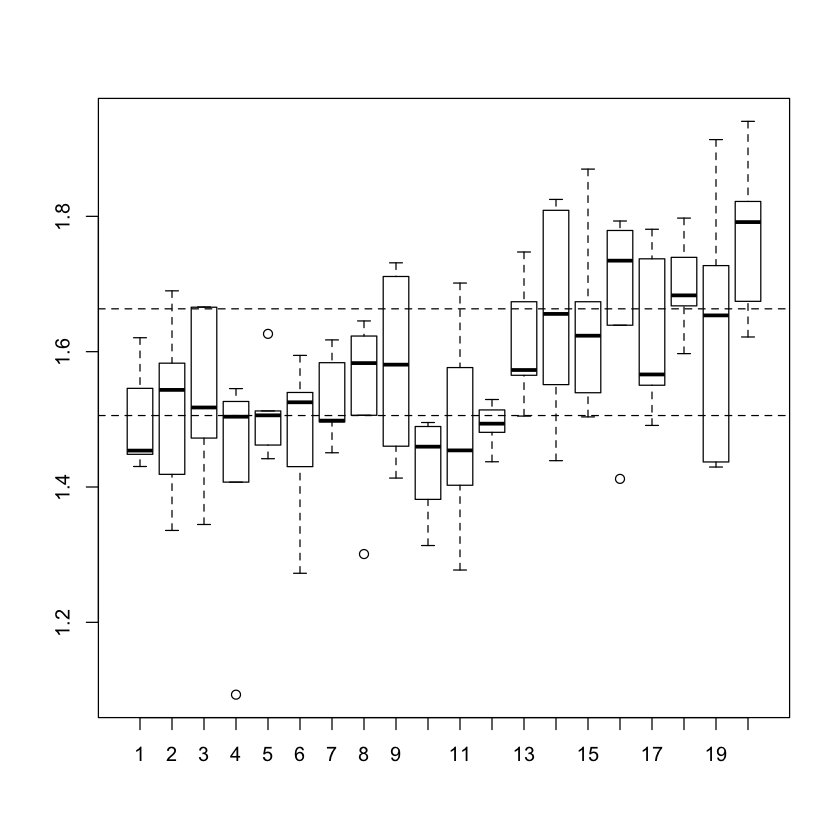

In [19]:
plot(output ~ factor(samp_num), data = hardbake.wide,
xlab = "", ylab = "")
abline(h = 1.5056, lty = 2)
abline(h = 1.6633, lty = 2)

### OC Curves for the Xbar and R Charts

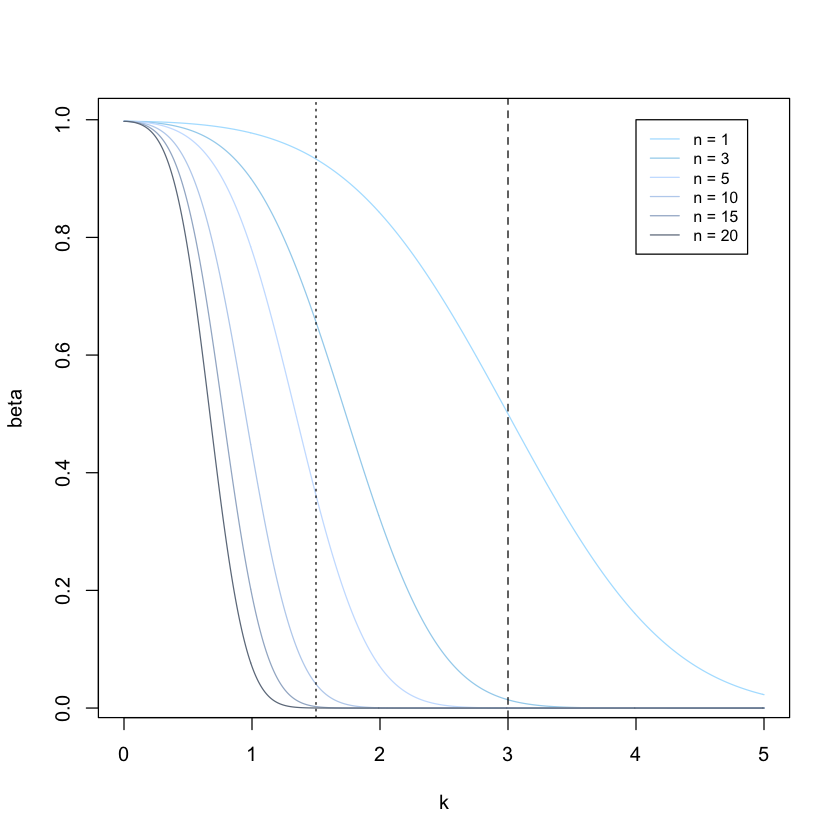

In [20]:
# define the beta function, x = k here
beta <- function(x, n, L = 3){
    pnorm(L - x * sqrt(n)) - pnorm(-L-x*sqrt(n))
}

# for n = 1, 3, 5, 10, 15, 20
k = seq(0, 5, by = 0.01)
plot(k, beta(k, 1, 3), type = "l", col = "lightskyblue1", ylab = "beta")
lines(k,beta(k, 3, 3), col = "lightskyblue2")
lines(k,beta(k, 5, 3), col = "lightsteelblue1")
lines(k,beta(k, 10, 3), col = "lightsteelblue2")
lines(k,beta(k, 15, 3), col = "lightsteelblue3")
lines(k,beta(k, 20, 3), col = "lightsteelblue4")
abline(v = 3.0, lty = 2)
abline(v = 1.5, lty = 3)
legend(4, 1, legend=c("n = 1", "n = 3","n = 5","n = 10","n = 15", "n = 20"),
       col=c("lightskyblue1", "lightskyblue2","lightsteelblue1","lightsteelblue2","lightsteelblue3","lightsteelblue4"), 
       lty = 1, cex=0.8)

In [21]:
# probability of not detecting a 1.5 sigma shift in mean
c(
    beta(1.5, 1, 3), # for n = 1
    beta(1.5, 3, 3), # for n = 3
    beta(1.5, 5, 3), # for n = 5
    beta(1.5, 10, 3), # for n = 10
    beta(1.5, 15, 3), # for n = 15
    beta(1.5, 20, 3)  # for n = 20
)

[1] 0.9331894011 0.6561299317 0.3616312342 0.0406304449 0.0024811185
[6] 0.0001043673

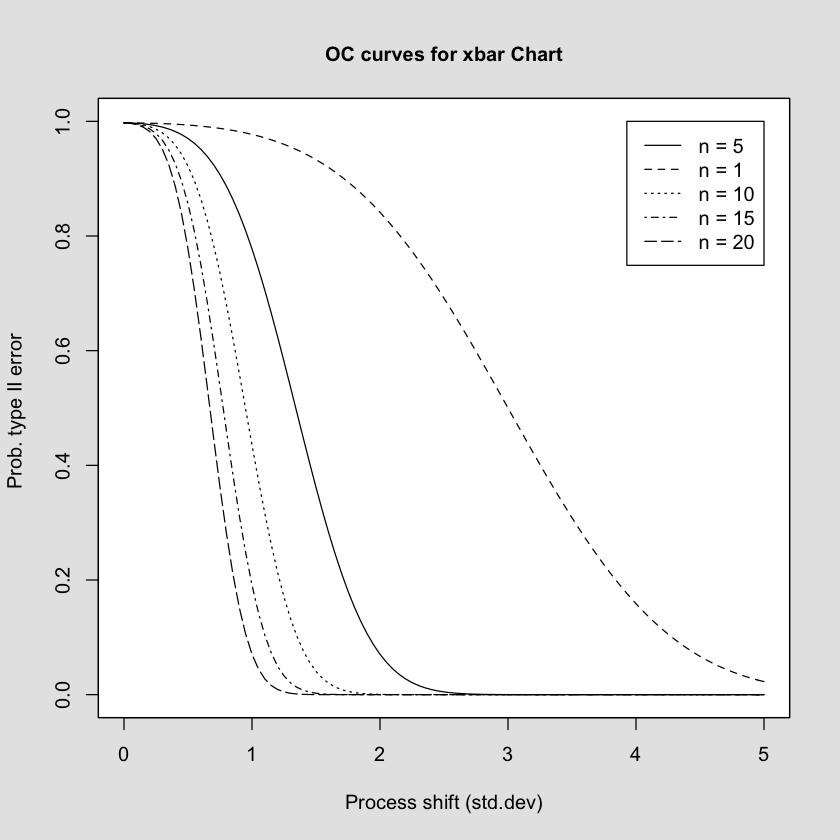

In [22]:
# using the qcc function
oc.curves(qchart.x)

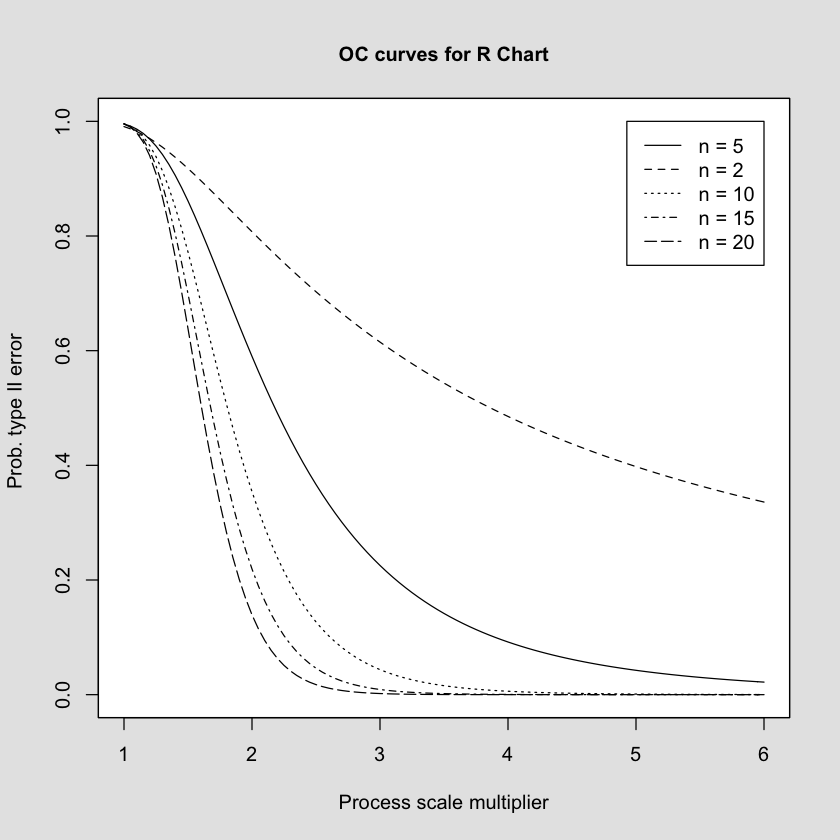

In [23]:
oc.curves(qchart.r)

## Xbar and S Charts

In [24]:
# Using the piston ring example in Montgomery
piston.p1 <- rbind(
    c(74.030,74.002, 74.019, 73.992, 74.008),
    c(73.995,73.992, 74.001, 74.011, 74.004),
    c(73.988,74.024, 74.021, 74.005, 74.002),
    c(74.002,73.996, 73.993, 74.015, 74.009),
    c(73.992,74.007, 74.015, 73.989, 74.014),
    c(74.009,73.994, 73.997, 73.985, 73.993),
    c(73.995,74.006, 73.994, 74.000, 74.005),
    c(73.985,74.003, 73.993, 74.015, 73.988),
    c(74.008,73.995, 74.009, 74.005, 74.004),
    c(73.998,74.000, 73.990, 74.007, 73.995),
    c(73.994,73.998, 73.994, 73.995, 73.990),
    c(74.004,74.000, 74.007, 74.000, 73.996),
    c(73.983,74.002, 73.998, 73.997, 74.012),
    c(74.006,73.967, 73.994, 74.000, 73.984),
    c(74.012,74.014, 73.998, 73.999, 74.007),
    c(74.000,73.984, 74.005, 73.998, 73.996),
    c(73.994,74.012, 73.986, 74.005, 74.007),
    c(74.006,74.010, 74.018, 74.003, 74.000),
    c(73.984,74.002, 74.003, 74.005, 73.997),
    c(74.000,74.010, 74.013, 74.020, 74.003),
    c(73.982,74.001, 74.015, 74.005, 73.996),
    c(74.004,73.999, 73.990, 74.006, 74.009),
    c(74.010,73.989, 73.990, 74.009, 74.014),
    c(74.015,74.008, 73.993, 74.000, 74.010),
    c(73.982,73.984, 73.995, 74.017, 74.013)
)

colnames(piston.p1) <- c("samp_1","samp_2","samp_3","samp_4","samp_5")

head(piston.p1)

samp_1,samp_2,samp_3,samp_4,samp_5
74.030,74.002,74.019,73.992,74.008
73.995,73.992,74.001,74.011,74.004
73.988,74.024,74.021,74.005,74.002
74.002,73.996,73.993,74.015,74.009
73.992,74.007,74.015,73.989,74.014
74.009,73.994,73.997,73.985,73.993


In [25]:
# get sample means and sample standard deviations
samp_means <- apply(piston.p1, 1, mean)
samp_means

[1] 74.0102 74.0006 74.0080 74.0030 74.0034 73.9956 74.0000 73.9968 74.0042
[10] 73.9980 73.9942 74.0014 73.9984 73.9902 74.0060 73.9966 74.0008 74.0074
[19] 73.9982 74.0092 73.9998 74.0016 74.0024 74.0052 73.9982

In [26]:
samp_stdev <- apply(piston.p1, 1, sd)
samp_stdev

[1] 0.014771594 0.007503333 0.014747881 0.009082951 0.012218838 0.008706320
 [7] 0.005522681 0.012255611 0.005540758 0.006284903 0.002863564 0.004219005
[13] 0.010454664 0.015303594 0.007314369 0.007797435 0.010568822 0.006985700
[19] 0.008467585 0.007981228 0.012153189 0.007436397 0.011928956 0.008700575
[25] 0.016177144

In [27]:
# grand mean and standard deviation
c(mean(samp_means), mean(samp_stdev))

[1] 74.001176000  0.009399484

In [28]:
# tabulated values are:
A3 = 1.427
B3 = 0
B4 = 2.089

In [29]:
# using the xbar and s definition
ucl.x = mean(samp_means) + A3 * mean(samp_stdev)
lcl.x = mean(samp_means) - A3 * mean(samp_stdev)

c(lcl.x, ucl.x)

[1] 73.98776 74.01459

In [30]:
# using the xbar and R definition
samp_range <- apply(piston.p1, 1, function(x) max(x) - min(x))
A2 <- 0.577

# our control limits for the xbar chart
lcl.x <- mean(samp_means) - A2 * mean(samp_range)
ucl.x <- mean(samp_means) + A2 * mean(samp_range)

c(lcl.x, ucl.x)

[1] 73.98777 74.01459

In [31]:
ucl.s = B4 * mean(samp_stdev)
lcl.s = B3 * mean(samp_stdev)

c(lcl.s, ucl.s)

[1] 0.00000000 0.01963552

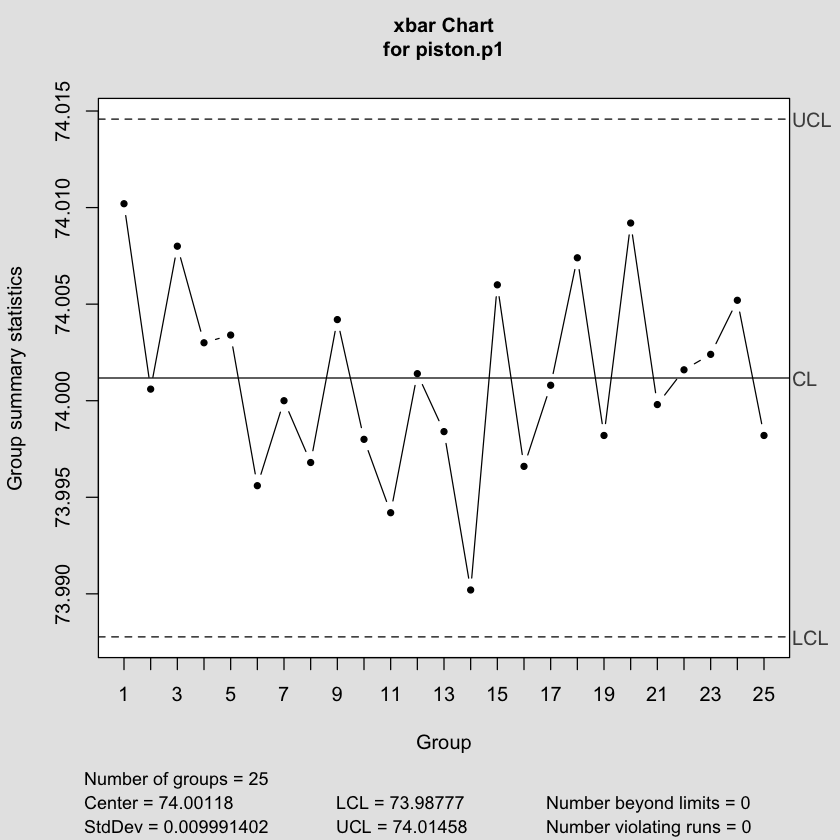

In [32]:
# The xbar chart uses the same code
piston.p1.xbar <- qcc(piston.p1, type = "xbar")
plot(piston.p1.xbar)

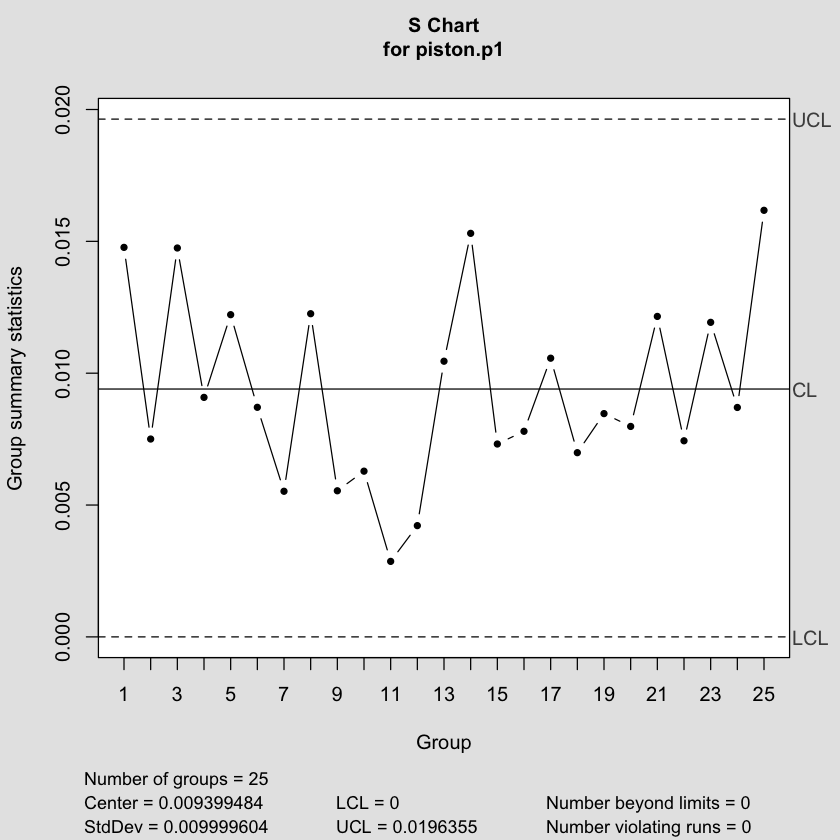

In [33]:
# The s chart is generated from the qcc package as
piston.p1.s <- qcc(piston.p1, type = "S")
plot(piston.p1.s)

In [34]:
piston.p1.s$limits

LCL,UCL
0,0.0196355


### Variable Sample Sizes

The Xbar and S Chart has an easier method for using variable sample sizes in the chart. In the qcc package, differing sample sizes are indicated by using NA values in the rows with fewer samples.

In [35]:
# Modified Piston Ring Example
piston2.p1 <- rbind(
    c(74.030,74.002, 74.019, NA, NA),
    c(73.995,73.992, 74.001, 74.011, NA),
    c(73.988,74.024, 74.021, 74.005, NA),
    c(74.002,73.996, 73.993, NA, NA),
    c(73.992,74.007, 74.015, NA, NA),
    c(74.009,73.994, 73.997, 73.985, 73.993),
    c(73.995,74.006, 73.994, 74.000, 74.005),
    c(73.985,74.003, 73.993, 74.015, NA),
    c(74.008,73.995, 74.009, 74.005, NA),
    c(73.998,74.000, 73.990, 74.007, NA),
    c(73.994,73.998, 73.994, NA, NA),
    c(74.004,74.000, 74.007, NA, NA),
    c(73.983,74.002, 73.998, 73.997, NA),
    c(74.006,73.967, 73.994, 74.000, 73.984),
    c(74.012,74.014, 73.998, 73.999, 74.007),
    c(74.000,73.984, 74.005, NA, NA),
    c(73.994,74.012, 73.986, NA, NA),
    c(74.006,74.010, 74.018, 74.003, 74.000),
    c(73.984,74.002, 74.003, 74.005, 73.997),
    c(74.000,74.010, 74.013, 74.020, 74.003),
    c(73.982,74.001, 74.015, 74.005, NA),
    c(74.004,73.999, 73.990, 74.006, NA),
    c(74.010,73.989, 73.990, 74.009, 74.014),
    c(74.015,74.008, 73.993, 74.000, 74.010),
    c(73.982,73.984, 73.995, 74.017, 74.013)
)

colnames(piston2.p1) <- c("samp_1","samp_2","samp_3","samp_4","samp_5")

head(piston2.p1)

samp_1,samp_2,samp_3,samp_4,samp_5
74.030,74.002,74.019,NA,NA
73.995,73.992,74.001,74.011,NA
73.988,74.024,74.021,74.005,NA
74.002,73.996,73.993,NA,NA
73.992,74.007,74.015,NA,NA
74.009,73.994,73.997,73.985,73.993


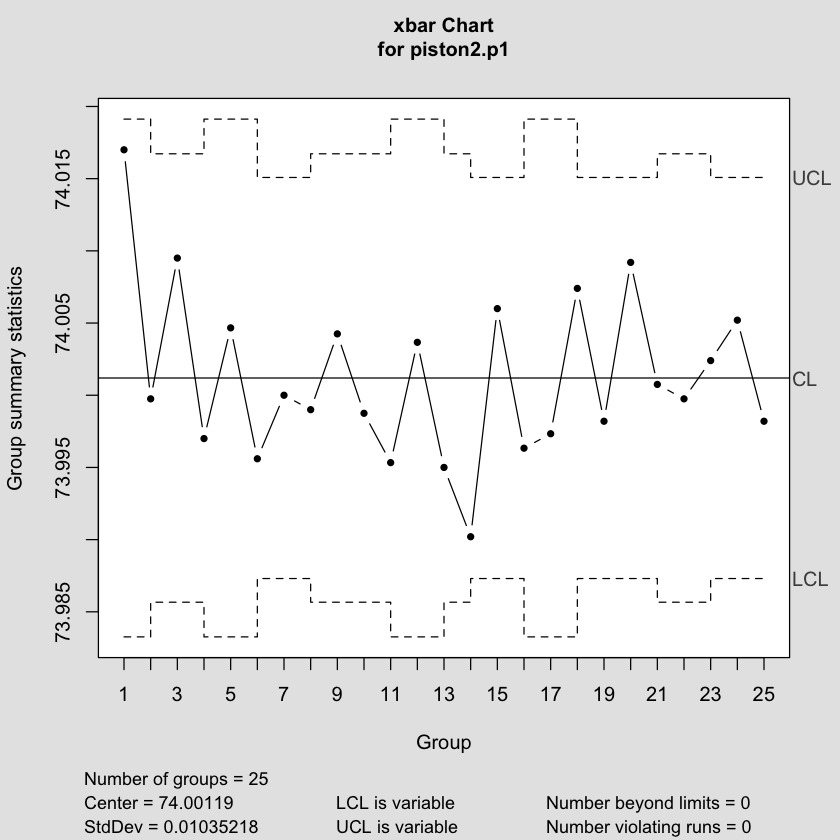

In [36]:
piston2.p1.x <- qcc(piston2.p1, type = "xbar")
plot(piston2.p1.x)

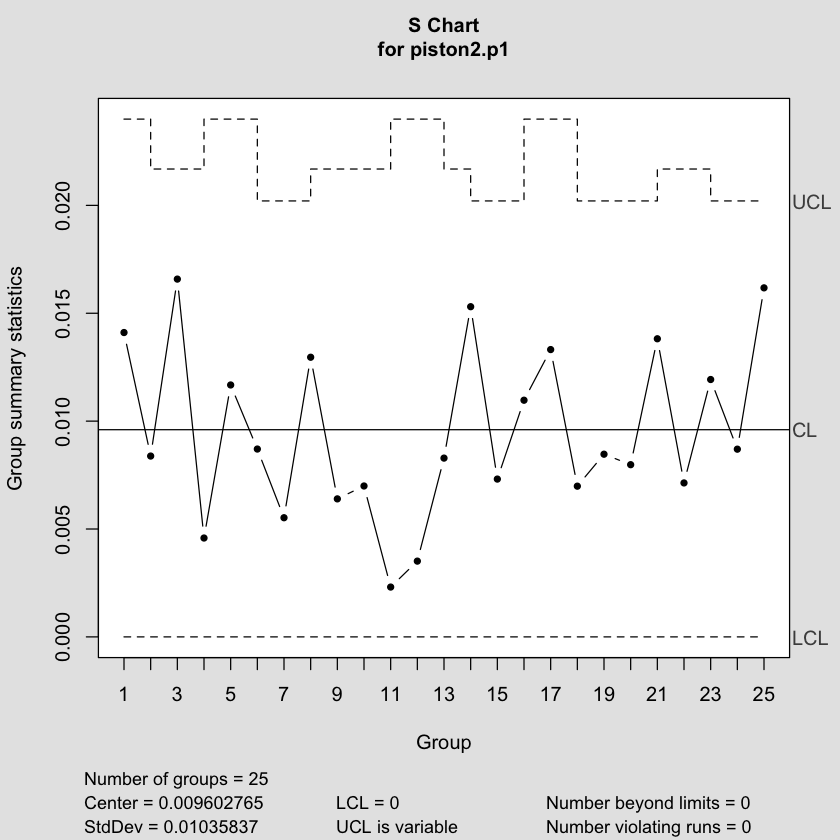

In [37]:
piston2.p1.s <- qcc(piston2.p1, type = "S")
plot(piston2.p1.s)

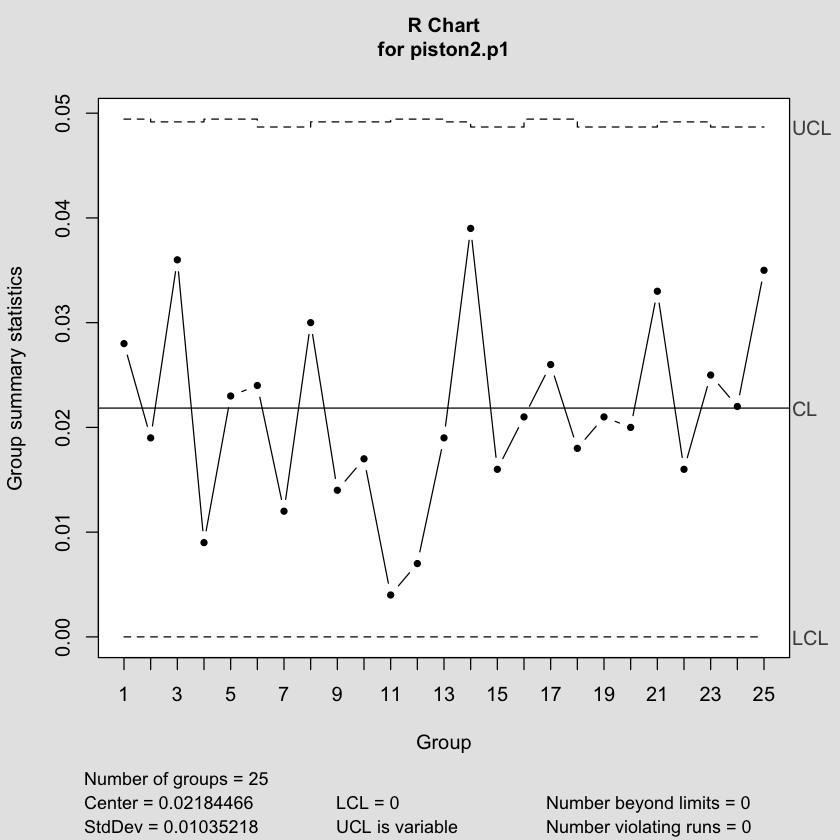

In [38]:
# note that this also applies for the R chart
# however computing the control limits is a much more involved process

piston2.p1.r <- qcc(piston2.p1, type = "R")
plot(piston2.p1.r)

When there are varying sample sizes, there are various ways for us to estimate the standard deviation of the process. We show here two methods.

In [39]:
# using the modal sample size
table(apply(piston2.p1, 1, function(x) sum(!is.na(x)))) # 5 item subgroups are more common in the sample


 3  4  5 
 7  8 10 

In [40]:
# average the standard deviation only for samples with n = 5
samp_counts <- apply(piston2.p1, 1, function(x) sum(!is.na(x)))
samp_stdevs <- apply(piston2.p1[samp_counts == 5,],1,sd)

mean(samp_stdevs)/0.9400 # c4 for n = 5 is 0.9400

[1] 0.01032853

In [41]:
# using the average sample size
mean(samp_counts)

[1] 4.12

In [42]:
samp_stdevs <- apply(piston2.p1,1,function(x) sd(x, na.rm = TRUE))

sd_est <- sum(samp_stdevs * (samp_counts - 1))/sum(samp_counts - 1)
sd_est / 0.9213 # c4 for n = 4 is 0.9213

[1] 0.01045022

### OC Curves for the S Chart

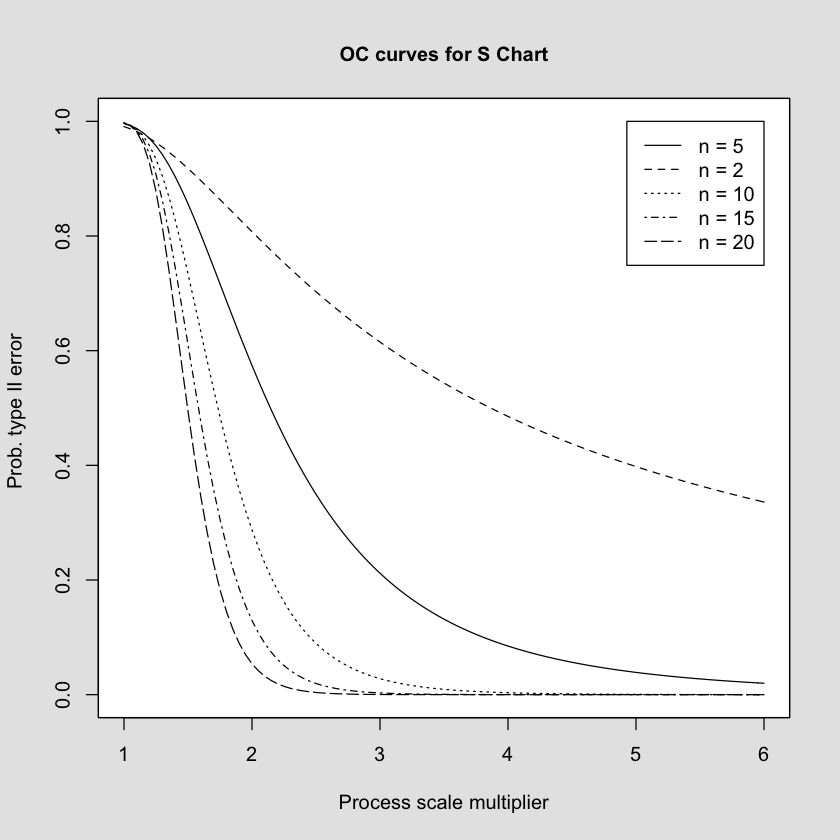

In [43]:
oc.curves(piston.p1.s)

## X and MR Charts for Individual Measures

In [44]:
loans1 <- data.frame(cost = c(310,288,297,298,307,303,294,297,308,
306,294,299,297,299,314,295,293,306,301,304)) # phase 1 data

loans2 <- data.frame(cost = c(305,282,305,296,314,295,287,301,298,311,
310,292,305,299,304,310,304,305,333,328)) # phase 2 data

head(loans1)

cost
310
288
297
298
307
303


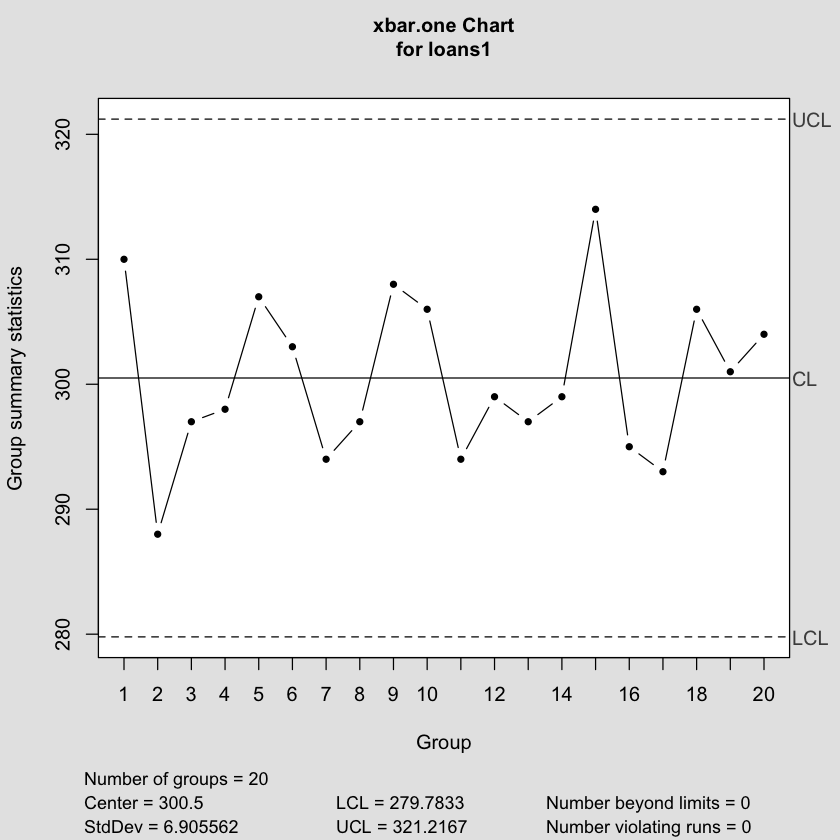

In [45]:
qchart.x <- qcc(loans1, type="xbar.one")

In [46]:
loans1.mr <- data.frame(x1 = loans1$cost[1:nrow(loans1)-1], x2 = loans1$cost[2:nrow(loans1)])
head(loans1.mr)

x1,x2
310,288
288,297
297,298
298,307
307,303
303,294


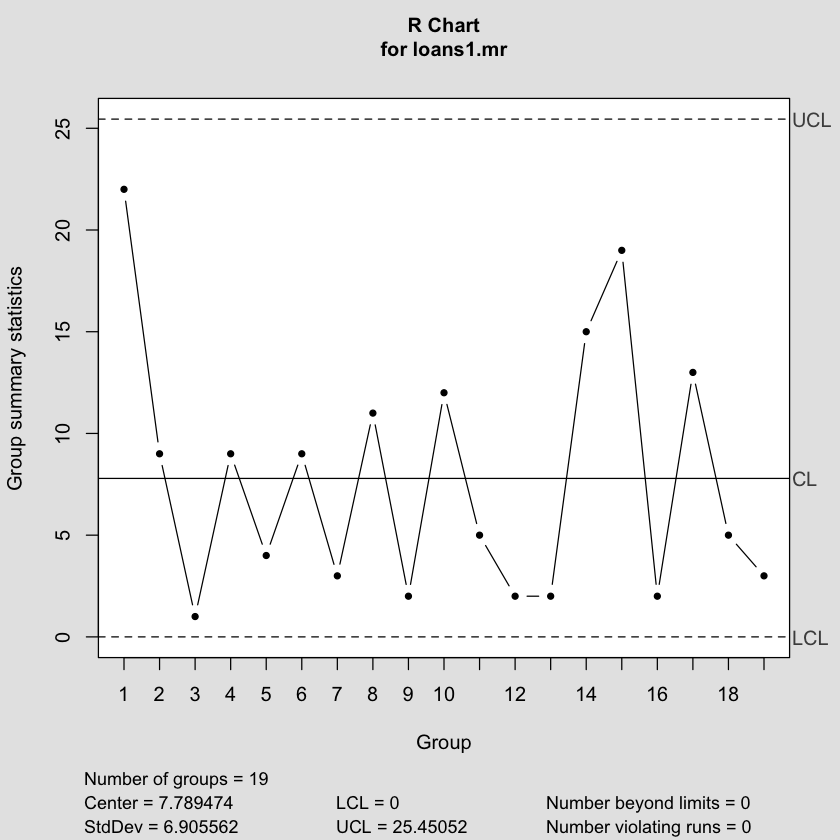

In [51]:
qchart.r <- qcc(loans1.mr, type = "R")

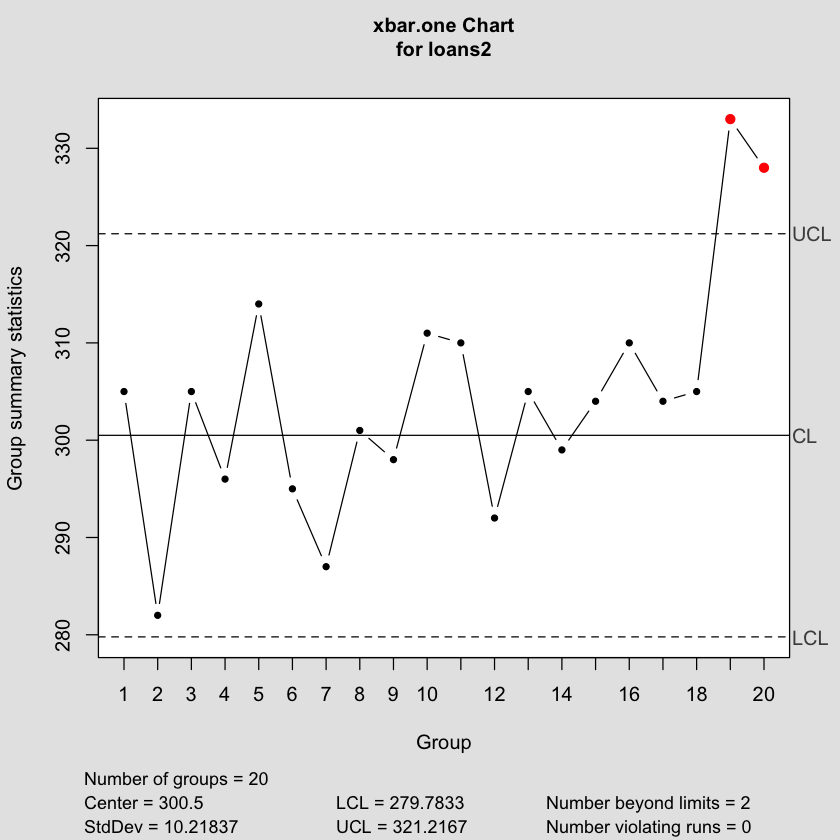

In [53]:
qchart2.x <- qcc(loans2, type="xbar.one", limits = qchart.x$limits, center = qchart.x$center)

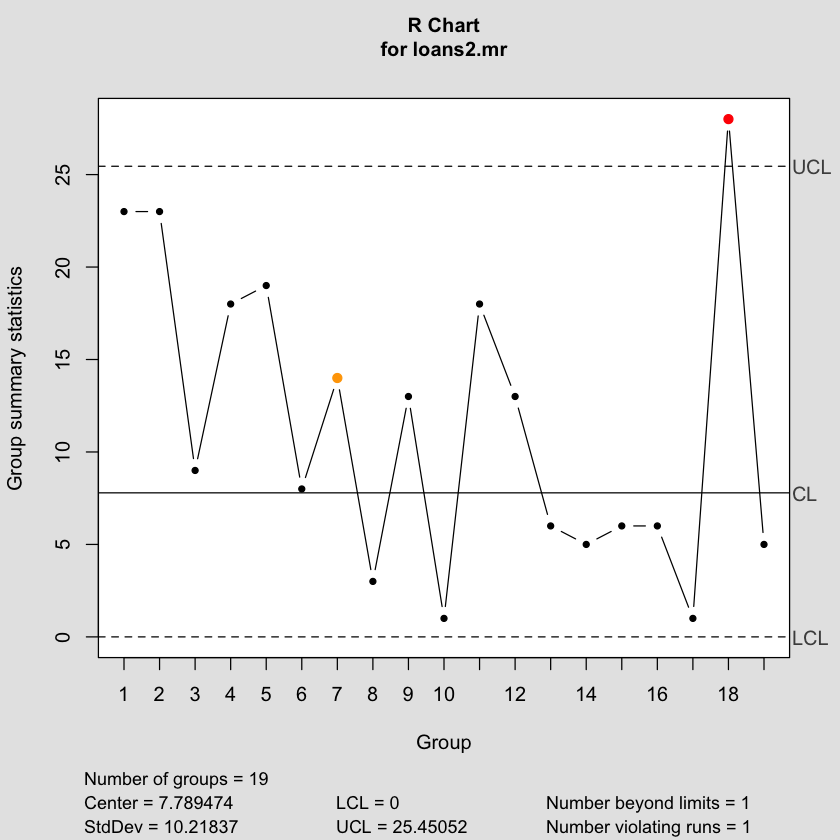

In [49]:
loans2.mr <- data.frame(x1 = loans2$cost[1:nrow(loans2)-1], x2 = loans2$cost[2:nrow(loans2)])
qchart2.r <- qcc(loans2.mr, type = "R", limits = qchart.r$limits, center = qchart.r$center)

## References

1. Douglas Montgomery. *Introduction to Statistical Quality Control, A Modern Introduction*. Hoboken, N.J. Wiley, 2009.
2. Luca Scrucca. qcc: an r package for quality control charting and statistical process control. *R News*, 4/1:11–17, 2004.